In [1]:
import sys
import os
import time
from sklearn import tree,svm
import numpy as np
import joblib
import pydotplus
import pandas as pd
from IPython.display import Image, display
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd()))+'/data/')
from read_PLAID_data import read_processed_data,read_index,get_feature_name

In [4]:
start_reading_time = time.time()
feature_select=['i_mean','i_wave_factor','i_pp_rms','i_thd','pure_thd','P','P_F','i_hp1','z_hp1','i_hm2','z_hm2','i_hp2','z_hp2','i_hm3','z_hm3','i_hp3','z_hp3','i_hm4','z_hm4','i_hp4','z_hp4','i_hm5','z_hm5','i_hp5','z_hp5','i_hm6','z_hm6','i_hp6','z_hp6','i_hm7','z_hm7','i_hp7','z_hp7']
# feature_select = get_feature_name()
selected_label = [
    'Air Conditioner', 'Blender', 'Coffee maker', 'Fan', 'Fridge', 'Hair Iron',
    'Hairdryer', 'Heater', 'Incandescent Light Bulb', 'Microwave',
    'Soldering Iron', 'Vacuum', 'Washing Machine', 'Water kettle'
]
x_mh_train, y_mh_train, mh_index_train = read_processed_data(
    'type',
    type_header='appliance',
    selected_label=selected_label,
    direaction=0,
    offset=0,
    each_lenth=1,
    feature_select=feature_select,
    source='submetered_new_pured/feature_process/training')
 
x_mh_validation, y_mh_validation, mh_index_validation = read_processed_data(
    'type',
    type_header='appliance',
    selected_label=selected_label,
    direaction=0,
    offset=0,
    each_lenth=1,
    feature_select=feature_select,
    source='submetered_new_pured/feature_process/validation')

x_mh_trainval = np.concatenate((x_mh_train, x_mh_validation),
                                   axis=0)
y_mh_trainval = np.concatenate((y_mh_train, y_mh_validation),
                                   axis=0)

x_mh_test, y_mh_test, mh_index_test = read_processed_data(
    'type',
    type_header='appliance',
    selected_label=selected_label,
    direaction=0,
    offset=0,
    each_lenth=1,
    feature_select=feature_select,
    source='submetered_new_pured/feature_process/testing')

print('finished loading data, cost %.3fs'%(time.time()-start_reading_time))    


finished loading data, cost 5.971s


Best score on validation set:0.69841
Best parameters:{'max_depth': 3, 'min_samples_leaf': 1}
Best score on test set:0.39332


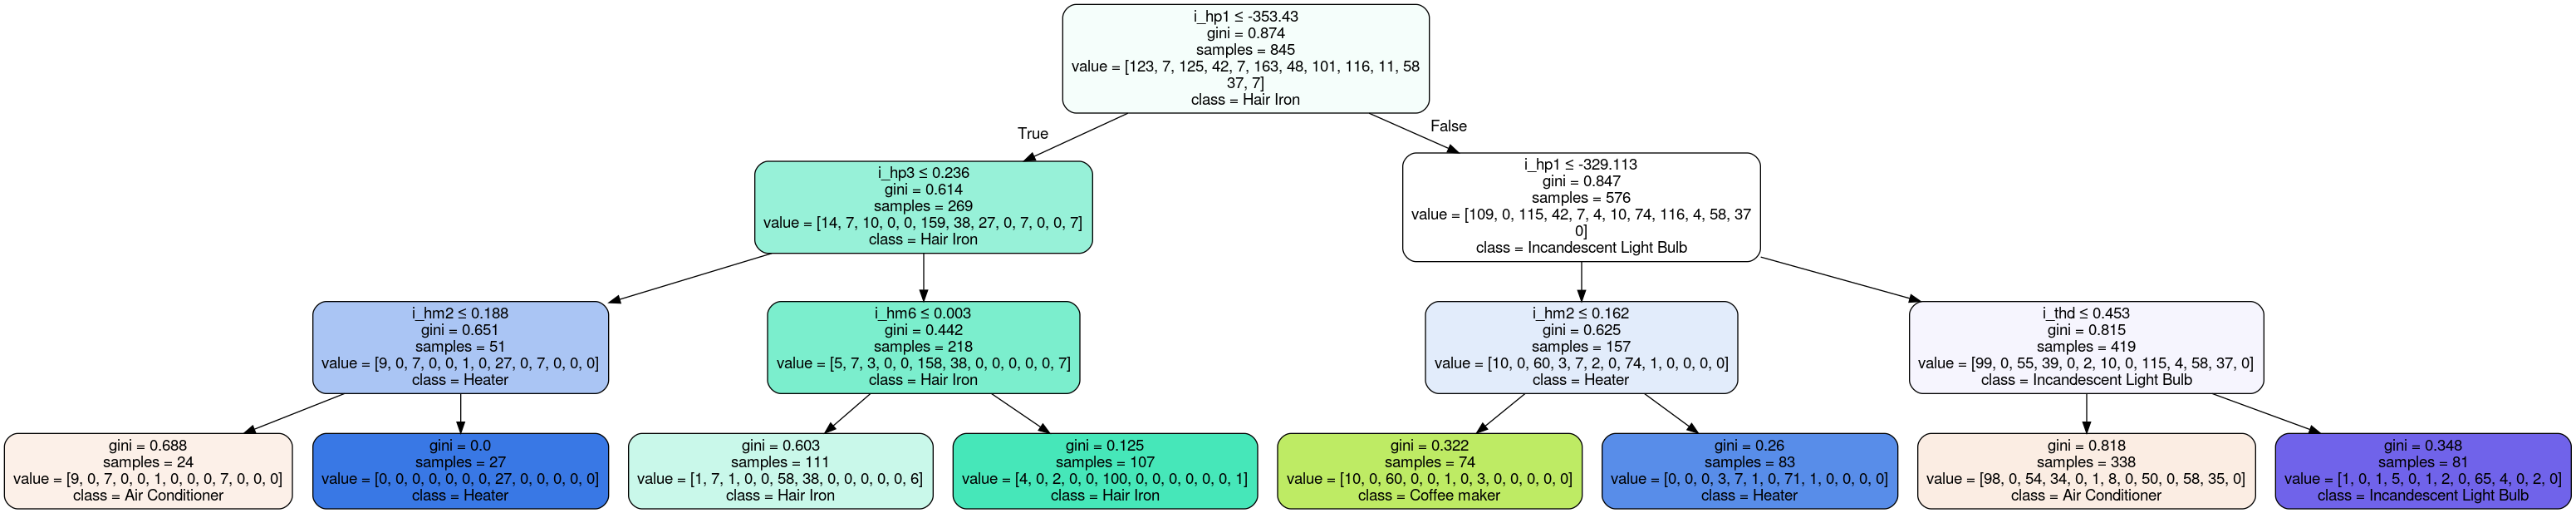

In [7]:
best_score = 0.0
for md in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for msl in [1, 2, 3, 4, 5, 10, 15, 20, 25, 50]:
        mh_tree = tree.DecisionTreeClassifier(max_depth=md,
                                                  min_samples_leaf=msl)
        mh_tree.fit(x_mh_train, y_mh_train)
        score = mh_tree.score(x_mh_validation, y_mh_validation)
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': 3, 'min_samples_leaf': 1}

mh_tree = tree.DecisionTreeClassifier(**best_parameters)
mh_tree.fit(x_mh_trainval, y_mh_trainval)
test_score = mh_tree.score(x_mh_test, y_mh_test)
print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.5f}".format(test_score))

dot_data = tree.export_graphviz(
    mh_tree,
    feature_names=feature_select,
    class_names=selected_label,
    filled=True,
    rounded=True,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

Best score on validation set:0.73589
Best parameters:{'max_depth': 2, 'min_samples_leaf': 10}


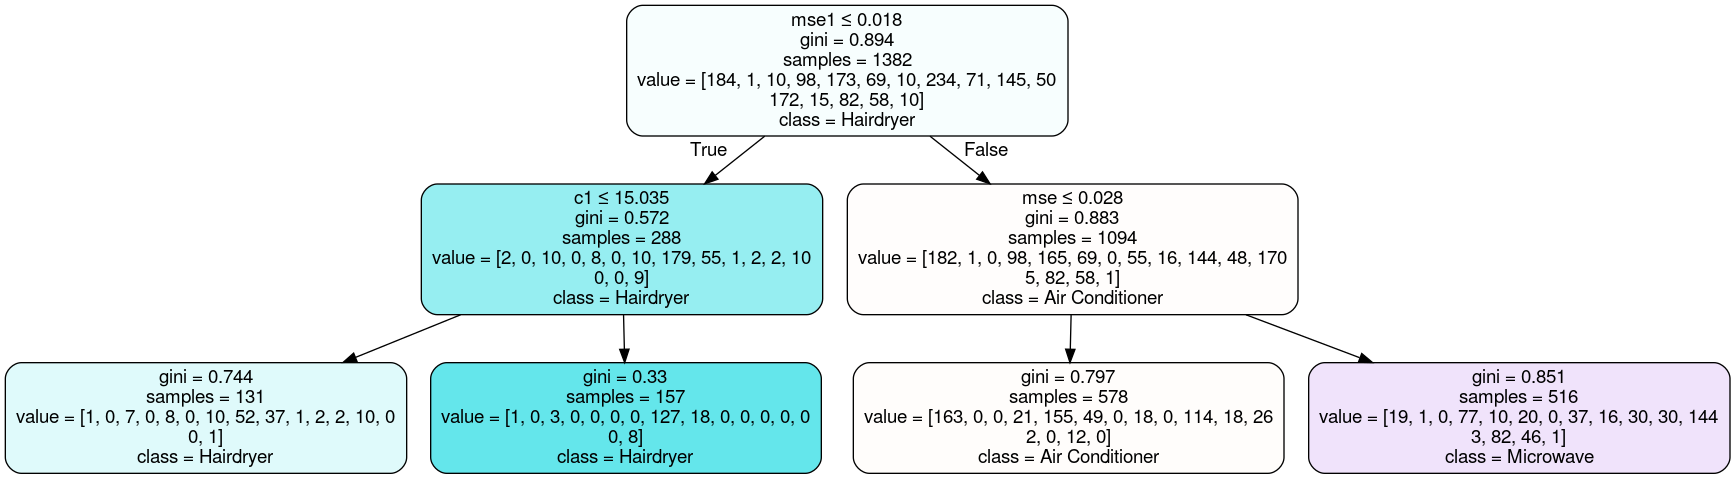

In [2]:
fit_result = pd.read_csv('/home/chaofan/powerknowledge/model/knowledge_model_temp/fit_result_new.csv', skiprows=1)
best_score=0
x = fit_result.iloc[:, 2:14]
y = fit_result.iloc[:, 14]
for md in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    for mss in [10, 15, 20, 25, 50, 100, 150, 200]:
        module_tree = tree.DecisionTreeClassifier(max_depth=md,
                                                  min_samples_leaf=mss)
        module_tree.fit(x, y)
        score = module_tree.score(x, y)
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth': 2, 'min_samples_leaf': mss}

module_tree = tree.DecisionTreeClassifier(**best_parameters)
module_tree.fit(x, y)
print("Best score on validation set:{:.5f}".format(best_score))
print("Best parameters:{}".format(best_parameters))


feature_select = ['a','b','c','k','fi','mse','a1','b1','c1','k1','fi1','mse1']


dot_data = tree.export_graphviz(
    module_tree,
    feature_names=feature_select,
    class_names=[
    'Air Conditioner', 'Blender', 'Coffee maker','Compact Fluorescent Lamp', 'Fan', 'Fridge', 'Hair Iron',
    'Hairdryer', 'Heater', 'Incandescent Light Bulb', 'Laptop','Microwave',
    'Soldering Iron', 'Vacuum', 'Washing Machine', 'Water kettle'
],
    filled=True,
    rounded=True,
    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))